# DQN

In [1]:
# Importing section

import gym
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

from matplotlib.animation import FuncAnimation
from IPython.display import Video
from collections import deque

In [2]:
# Initialiting the environment

env = gym.make('BattleZone-ram-v0')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)
env.unwrapped.get_action_meanings()

State shape:  (128,)
Number of actions:  18


['NOOP',
 'FIRE',
 'UP',
 'RIGHT',
 'LEFT',
 'DOWN',
 'UPRIGHT',
 'UPLEFT',
 'DOWNRIGHT',
 'DOWNLEFT',
 'UPFIRE',
 'RIGHTFIRE',
 'LEFTFIRE',
 'DOWNFIRE',
 'UPRIGHTFIRE',
 'UPLEFTFIRE',
 'DOWNRIGHTFIRE',
 'DOWNLEFTFIRE']

In [3]:
# Instantiating the agent

from dqn_agent import Agent

agent = Agent(env, state_space_dim=128, action_space_dim=4, seed=0)

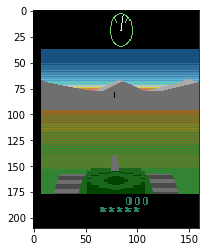

In [4]:
# Random sequence

sequenza = agent.play()
patch = plt.imshow(sequenza[0], cmap=None)  
animation = FuncAnimation(plt.gcf(), lambda x:patch.set_data(sequenza[x]), frames = len(sequenza), interval = 20)
animation.save('video Test.mp4')
Video("video Test.mp4")

In [5]:
# DQN Algorithm

def dqn (env, Agent, n_episodes = 20000, n_steps_episodes = 10000, eps_start = 1.0, eps_end = 0.01, eps_decay = 0.995):
    
    scores = [] # List of scores for plotting
    scores_deq = deque(maxlen = 100) # Deque useful to compute
    eps = eps_start
    
    for episode in range(1, n_episodes+1):
        
        state = env.reset()
        score = 0
        
        for step in range(1, n_steps_episodes + 1):
            
            action = Agent.act(state, eps)
            next_state, reward, is_done, info = env.step(action)
            Agent.Step(state, action, reward, next_state, is_done)
            state = next_state
            score += reward
            
            if is_done:
                break
                
        scores_deq.append(score)
        scores.append(score)
        eps = max(eps_end, eps*eps_decay)
        
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deq)), end="")
        
        if episode % 500 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_deq)))
            sequenza = Agent.play()
            patch = plt.imshow(sequenza[0], cmap=None)  
            animation = FuncAnimation(plt.gcf(), lambda x:patch.set_data(sequenza[x]), frames = len(sequenza), interval = 20)
            animation.save('video {}.mp4'.format(episode))
                     
        if np.mean(scores_deq)>=80000:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_deq)))
            torch.save(Agent.Q_network.state_dict(), 'checkpoint.pth')
            sequenza = Agent.play()
            patch = plt.imshow(sequenza[0], cmap=None)  
            animation = FuncAnimation(plt.gcf(), lambda x:patch.set_data(sequenza[x]), frames = len(sequenza), interval = 20)
            animation.save('video {}.mp4'.format(episode))
            
            break
        
        if episode == 2000:
            print('Stopped after 2000 episodes')
            break
    
    return scores          

In [ ]:
scores = dqn(env, agent)